<a href="https://colab.research.google.com/github/Maestria-IA-Aplicada-2025/semana-4/blob/main/Cudf_pandas_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import os

In [2]:
# URL del archivo CSV en Dropbox
# url = "https://www.dropbox.com/scl/fi/1ey4norrwpvjvz4oj656g/Books_rating.csv?rlkey=k1eiy9jph0y2iu9kbofastsq7&st=rnyydn6b&dl=1"

# Leer el archivo CSV directamente desde la URL de Dropbox
#df = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
#df.head()

In [3]:
# Cargar el archivo CSV (ajustar la ruta si el archivo se encuentra en una ubicación diferente)
file_path = '/kaggle/input/depression-dataset/depression_data.csv'  # Ajusta este path con el nombre y ubicación de tu archivo

In [4]:
# Leer los datos con pandas
df = pd.read_csv(file_path)

In [5]:
# Mostrar las primeras filas del dataframe para verificar la carga de los datos
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [6]:
# Si es necesario, puedes realizar análisis como 'describe' o cualquier otro análisis estadístico.
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [7]:
# Realizar una descripción básica del DataFrame
print(df.describe())

# Si deseas trabajar con columnas específicas, puedes hacer algo como:
# df['column_name'].mean()  # Promedio de una columna


                 Age  Number of Children         Income
count  413768.000000       413768.000000  413768.000000
mean       49.000713            1.298972   50661.707971
std        18.158759            1.237054   40624.100565
min        18.000000            0.000000       0.410000
25%        33.000000            0.000000   21001.030000
50%        49.000000            1.000000   37520.135000
75%        65.000000            2.000000   76616.300000
max        80.000000            4.000000  209995.220000


# Guardar y consultar datos desde una base de datos SQLite

Utiliza sqlite3 para crear una base de datos en memoria y guardar la tabla. Luego consulta todos los datos con SQL.

In [8]:
import sqlite3

# TU CÓDIGO AQUÍ:
conn = sqlite3.connect(":memory:")
df.to_sql("depression", conn, index=False, if_exists="replace")
df_sql = pd.read_sql("SELECT * FROM depression", conn)
df_sql


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


# Análisis de datos con pandas

¿Cuál es la edad promedio por clase?

In [9]:
# Edad promedio por Nivel de Educación
df_sql.groupby("Education Level")["Age"].mean()

Education Level
Associate Degree     49.858361
Bachelor's Degree    49.232593
High School          45.195826
Master's Degree      52.434267
PhD                  55.078770
Name: Age, dtype: float64

¿Cuántas personas sobrevivieron por género?

In [10]:
# Consumo de alcohol por nivel de educación 
df_sql.groupby("Education Level")["Alcohol Consumption"].sum()

Education Level
Associate Degree     ModerateHighModerateModerateLowModerateModerat...
Bachelor's Degree    ModerateModerateLowModerateModerateModerateHig...
High School          HighLowLowModerateModerateModerateModerateLowH...
Master's Degree      LowModerateHighHighModerateHighModerateLowHigh...
PhD                  HighHighLowHighHighHighLowLowLowModerateModera...
Name: Alcohol Consumption, dtype: object

# Visualización con matplotlib
Crea un histograma de la columna Age.

Crea un gráfico de barras de Consumo de alcohol agrupado por nivel de educación.

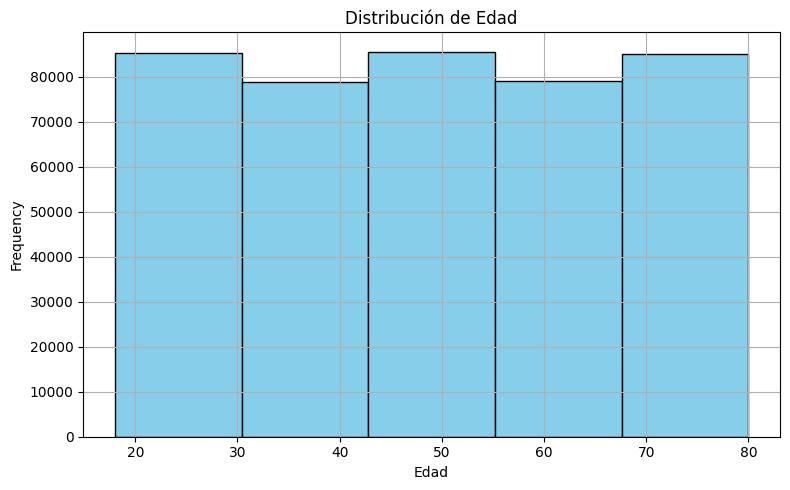

In [11]:
import matplotlib.pyplot as plt

# Histograma de edades
plt.figure(figsize=(8, 5))
df_sql["Age"].dropna().plot(kind='hist', bins=5, color='skyblue', edgecolor='black')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.grid(True)
plt.tight_layout()
plt.show()


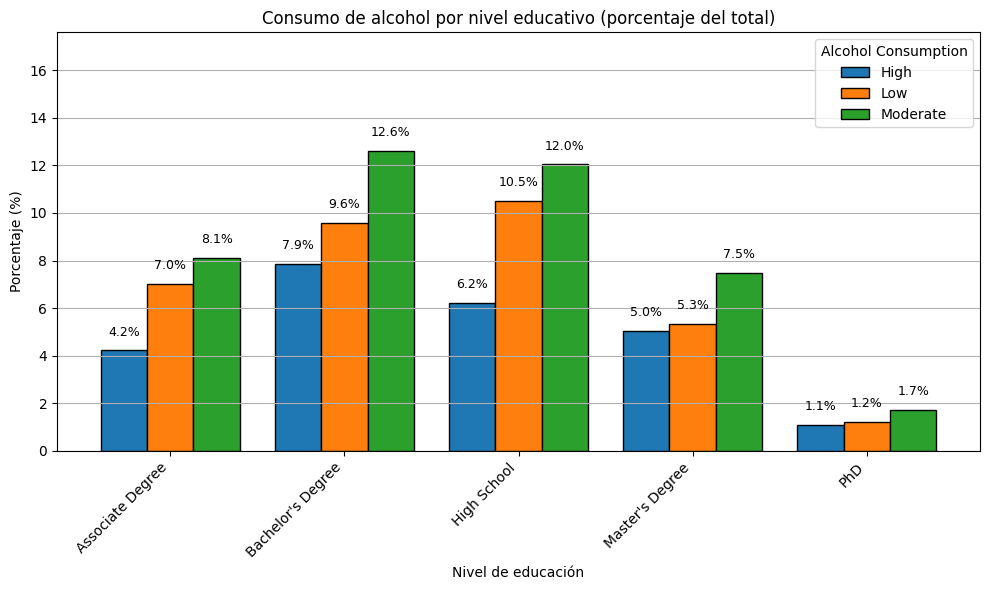

In [12]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada categoría de consumo de alcohol por nivel de educación
conteo_categorias = df_sql.groupby(["Education Level", "Alcohol Consumption"]).size().unstack().fillna(0)

# Calcular los porcentajes del total de los datos
total_datos = df_sql.shape[0]
porcentajes_totales = conteo_categorias.div(total_datos) * 100

# ==== Calcular tamaño dinámico de la figura ====
num_niveles = len(porcentajes_totales.index)
max_porcentaje = porcentajes_totales.max().max()

# Ajustes dinámicos con mínimos razonables
fig_width = max(10, num_niveles * 1.5)
fig_height = max(6, (max_porcentaje / 5))  # escala de altura según porcentaje

fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Crear gráfico
porcentajes_totales.plot(kind='bar', ax=ax, edgecolor='black', width=0.8)

# Etiquetas sobre cada barra
# Calcular el número total de categorías para espaciamiento horizontal
n_cat = len(porcentajes_totales.columns)
bar_width = 0.8 / n_cat  # dividir el ancho total de barra entre categorías

for i, categoria in enumerate(porcentajes_totales.columns):
    for j, valor in enumerate(porcentajes_totales[categoria]):
        if valor > 0:
            # Calcular posición horizontal centrada para cada barra individual
            x = j - 0.4 + bar_width / 2 + i * bar_width
            ax.text(x, valor + 0.5, f'{valor:.1f}%', ha='center', va='bottom', fontsize=9)


# Configuración del gráfico
ax.set_title("Consumo de alcohol por nivel educativo (porcentaje del total)")
ax.set_xlabel("Nivel de educación")
ax.set_ylabel("Porcentaje (%)")
ax.set_ylim(0, max_porcentaje + 5)  # margen para que no se corten las etiquetas
ax.set_xticklabels(porcentajes_totales.index, rotation=45, ha='right')
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()



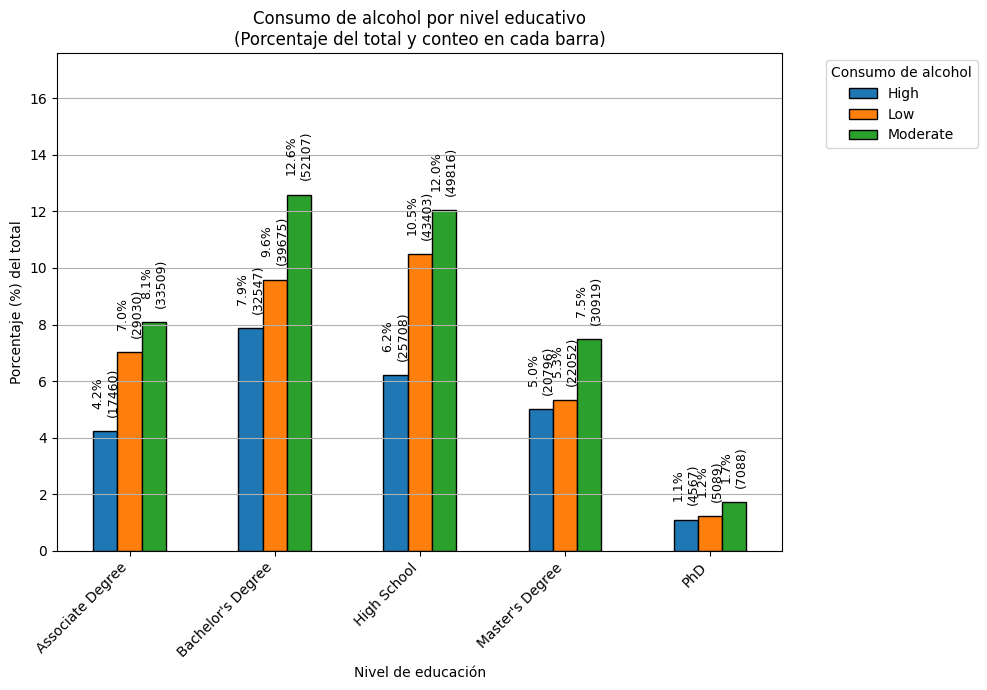

In [13]:
import matplotlib.pyplot as plt

# ====== Preparar los datos ======

# Conteo por Education Level y Alcohol Consumption
conteo = df_sql.groupby(["Education Level", "Alcohol Consumption"]).size().unstack(fill_value=0)

# Total general
total_general = conteo.values.sum()

# Porcentajes respecto al total general
porcentajes = conteo / total_general * 100

# ====== Ajuste dinámico de tamaño ======

num_categorias = len(conteo.index)
fig_width = max(10, num_categorias * 1.5)

fig, ax = plt.subplots(figsize=(fig_width, 7))

# ====== Gráfico ======

bars = porcentajes.plot(kind='bar', ax=ax, edgecolor='black')

# --- Ajustar el eje Y automáticamente al porcentaje máximo con un margen del 5%
max_pct = porcentajes.max().max()  # mayor porcentaje entre todas las categorías
ax.set_ylim(0, max_pct + 5)  # margen adicional para no cortar los textos

# Añadir etiquetas rotadas con porcentaje y total
for container in ax.containers:
    for bar in container:
        altura = bar.get_height()
        if altura > 0:
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_height()
            total_valor = int(total_general * (altura / 100))
            ax.text(x, y + 0.5, f'{altura:.1f}%\n({total_valor})', ha='center', va='bottom', fontsize=9, rotation=90)

# ====== Estética ======

ax.set_title("Consumo de alcohol por nivel educativo\n(Porcentaje del total y conteo en cada barra)")
ax.set_xlabel("Nivel de educación")
ax.set_ylabel("Porcentaje (%) del total")
ax.set_xticklabels(conteo.index, rotation=45, ha='right')
ax.legend(title="Consumo de alcohol", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y')
plt.tight_layout()
plt.show()


/tmp/ipykernel_13/2572435190.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(conteo_personas.index, rotation=45, ha='right')
/tmp/ipykernel_13/2572435190.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(porcentajes.index, rotation=45, ha='right')


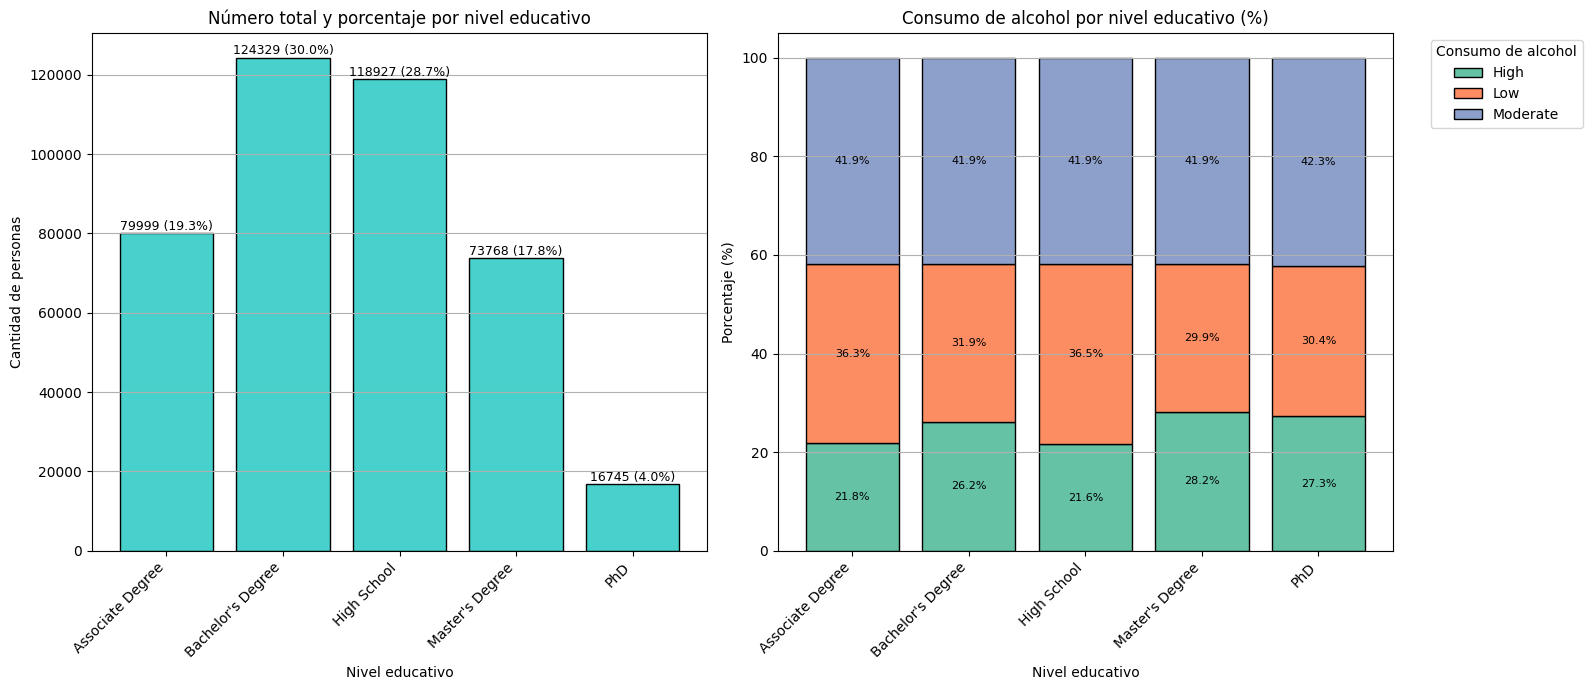

In [14]:
import matplotlib.pyplot as plt

# ====== Preparar los datos ======

# 1. Conteo de categorías de alcohol por educación
conteo_categorias = df_sql.groupby("Education Level")["Alcohol Consumption"].value_counts().unstack().fillna(0)

# 2. Porcentajes por nivel educativo
porcentajes = conteo_categorias.div(conteo_categorias.sum(axis=1), axis=0) * 100

# 3. Conteo total de personas por nivel educativo
conteo_personas = df_sql.groupby("Education Level").size()

# 4. Total general para calcular porcentajes
total_general = conteo_personas.sum()

# 5. Asegurar orden consistente
education_order = conteo_personas.index  # o sorted(porcentajes.index)
porcentajes = porcentajes.loc[education_order]
conteo_personas = conteo_personas.loc[education_order]

# ====== Crear los gráficos ======

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# --- Gráfico 1: Conteo total + porcentaje por nivel educativo
bars = axes[0].bar(conteo_personas.index, conteo_personas.values, color='mediumturquoise', edgecolor='black')

# Etiquetas sobre las barras
for i, bar in enumerate(bars):
    cantidad = conteo_personas.values[i]
    porcentaje = (cantidad / total_general) * 100
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                 f'{cantidad} ({porcentaje:.1f}%)', ha='center', va='bottom', fontsize=9)

axes[0].set_title("Número total y porcentaje por nivel educativo")
axes[0].set_ylabel("Cantidad de personas")
axes[0].set_xlabel("Nivel educativo")
axes[0].set_xticklabels(conteo_personas.index, rotation=45, ha='right')
axes[0].grid(axis='y')

# --- Gráfico 2: Barras apiladas de porcentajes por categoría de alcohol
colores = plt.get_cmap('Set2').colors
bottom = [0] * len(porcentajes)

for i, categoria in enumerate(porcentajes.columns):
    valores = porcentajes[categoria].values
    axes[1].bar(porcentajes.index, valores, bottom=bottom, label=categoria, color=colores[i % len(colores)], edgecolor='black')
    
    for j, (valor, b) in enumerate(zip(valores, bottom)):
        if valor > 0:
            axes[1].text(j, b + valor / 2, f'{valor:.1f}%', ha='center', va='center', fontsize=8)
    
    bottom = [b + v for b, v in zip(bottom, valores)]

axes[1].set_title("Consumo de alcohol por nivel educativo (%)")
axes[1].set_ylabel("Porcentaje (%)")
axes[1].set_xlabel("Nivel educativo")
axes[1].set_xticklabels(porcentajes.index, rotation=45, ha='right')
axes[1].grid(axis='y')
axes[1].legend(title="Consumo de alcohol", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Preprocesamiento de datos

In [15]:
from sklearn.preprocessing import LabelEncoder

# Cargar tus datos (simulado aquí, reemplaza por tu DataFrame real)
# df_sql = pd.read_sql("SELECT * FROM depression", conn)

# Selecciona solo las columnas categóricas excepto 'Name' e 'Income'
variables_a_transformar = [
    col for col in df_sql.select_dtypes(include='object').columns
    if col not in ['Name', 'Income']
]

# Crear una copia del DataFrame para no modificar el original
df_transformado = df_sql.copy()

# Guardar los mapeos
mapeos = {}

# Aplicar LabelEncoder y guardar el mapeo
for col in variables_a_transformar:
    le = LabelEncoder()
    df_transformado[col] = le.fit_transform(df_transformado[col].astype(str))
    mapeos[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Mostrar los primeros valores transformados
print(df_transformado.head())

# Mostrar los mapeos de transformación
for col, mapping in mapeos.items():
    print(f"\nVariable: {col}")
    for categoria, valor in mapping.items():
        print(f"  {categoria} --> {valor}")


               Name  Age  Marital Status  Education Level  Number of Children  \
0  Christine Barker   31               1                1                   2   
1  Jacqueline Lewis   55               1                2                   1   
2    Shannon Church   78               3                3                   1   
3    Charles Jordan   58               0                3                   3   
4      Michael Rich   18               2                2                   0   

   Smoking Status  Physical Activity Level  Employment Status     Income  \
0               2                        0                  1   26265.67   
1               2                        2                  0   42710.36   
2               2                        2                  0  125332.79   
3               2                        1                  1    9992.78   
4               2                        2                  1    8595.08   

   Alcohol Consumption  Dietary Habits  Sleep Patterns  

In [16]:
print(mapeos)

{'Marital Status': {'Divorced': 0, 'Married': 1, 'Single': 2, 'Widowed': 3}, 'Education Level': {'Associate Degree': 0, "Bachelor's Degree": 1, 'High School': 2, "Master's Degree": 3, 'PhD': 4}, 'Smoking Status': {'Current': 0, 'Former': 1, 'Non-smoker': 2}, 'Physical Activity Level': {'Active': 0, 'Moderate': 1, 'Sedentary': 2}, 'Employment Status': {'Employed': 0, 'Unemployed': 1}, 'Alcohol Consumption': {'High': 0, 'Low': 1, 'Moderate': 2}, 'Dietary Habits': {'Healthy': 0, 'Moderate': 1, 'Unhealthy': 2}, 'Sleep Patterns': {'Fair': 0, 'Good': 1, 'Poor': 2}, 'History of Mental Illness': {'No': 0, 'Yes': 1}, 'History of Substance Abuse': {'No': 0, 'Yes': 1}, 'Family History of Depression': {'No': 0, 'Yes': 1}, 'Chronic Medical Conditions': {'No': 0, 'Yes': 1}}


In [17]:
df_sql

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


In [18]:
df_transformado

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,1,1,2,2,0,1,26265.67,2,1,0,1,0,1,1
1,Jacqueline Lewis,55,1,2,1,2,2,0,42710.36,0,2,0,1,0,0,1
2,Shannon Church,78,3,3,1,2,2,0,125332.79,1,2,1,0,0,1,0
3,Charles Jordan,58,0,3,3,2,1,1,9992.78,2,1,2,0,0,0,0
4,Michael Rich,18,2,2,0,2,2,1,8595.08,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,1,3,0,1,1,0,109233.43,1,0,1,0,0,0,0
413764,Christina Brown,26,2,1,0,0,0,0,96760.97,1,0,2,1,1,0,1
413765,Matthew Jenkins,57,1,1,0,2,2,0,77353.26,2,1,0,0,0,1,1
413766,Gary Faulkner,71,1,0,2,2,2,1,24557.08,2,1,2,0,1,0,0


# Criterio para asumir depresión (si se cumple alguna de estas condiciones):

In [19]:
riesgo_depresion = (
    (df_transformado["History of Mental Illness"] == 1) |
    (df_transformado["History of Substance Abuse"] == 1) |
    (df_transformado["Family History of Depression"] == 1) |
    (df_transformado["Physical Activity Level"] == 1) |
    (df_transformado["Education Level"] == 1) |
    (df_transformado["Sleep Patterns"] == 0) |  # Suponiendo que 0 = sueño deficiente
    (df_transformado["Chronic Medical Conditions"] >= 1)
)

# Si quieres agregarlo como una nueva columna:
df_transformado["Depression"] = riesgo_depresion.astype(int)  # 1 = riesgo, 0 = no riesgo


In [20]:
# Crear variable objetivo "Depression" para verificar los datos ingresados
df_transformado["Depression"] = (
    (df_transformado["History of Mental Illness"] == 1) |
    (df_transformado["History of Substance Abuse"] == 1) |
    (df_transformado["Family History of Depression"] == 1) |
    (df_transformado["Physical Activity Level"] == 1) |
    (df_transformado["Education Level"] == 1) |
    (df_transformado["Sleep Patterns"] == 0) |
    (df_transformado["Chronic Medical Conditions"] >= 1)
).astype(int)

# Verificar cuántas personas fueron clasificadas como con/sin depresión
print(df_transformado["Depression"].value_counts())


Depression
1    391899
0     21869
Name: count, dtype: int64


# Entrenamiento

Preparo los datos

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Variables a usar como predictores (excluimos Name e Income)
features = df_transformado.drop(columns=["Name", "Income", "Depression"]).columns.tolist()

# Definir X (predictoras) e y (variable objetivo)
X = df_transformado[features]
y = df_transformado["Depression"]

# Dividir en conjunto de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Árbol de desición

Entreno el modelo para el árbol

In [22]:
# Inicializar y entrenar modelo
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Evaluo el modelo

In [23]:
# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))


Matriz de confusión:
 [[    0  4382]
 [    0 78372]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4382
           1       0.95      1.00      0.97     78372

    accuracy                           0.95     82754
   macro avg       0.47      0.50      0.49     82754
weighted avg       0.90      0.95      0.92     82754

Precisión del modelo: 0.9470478768397902


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Visualizo el árbol

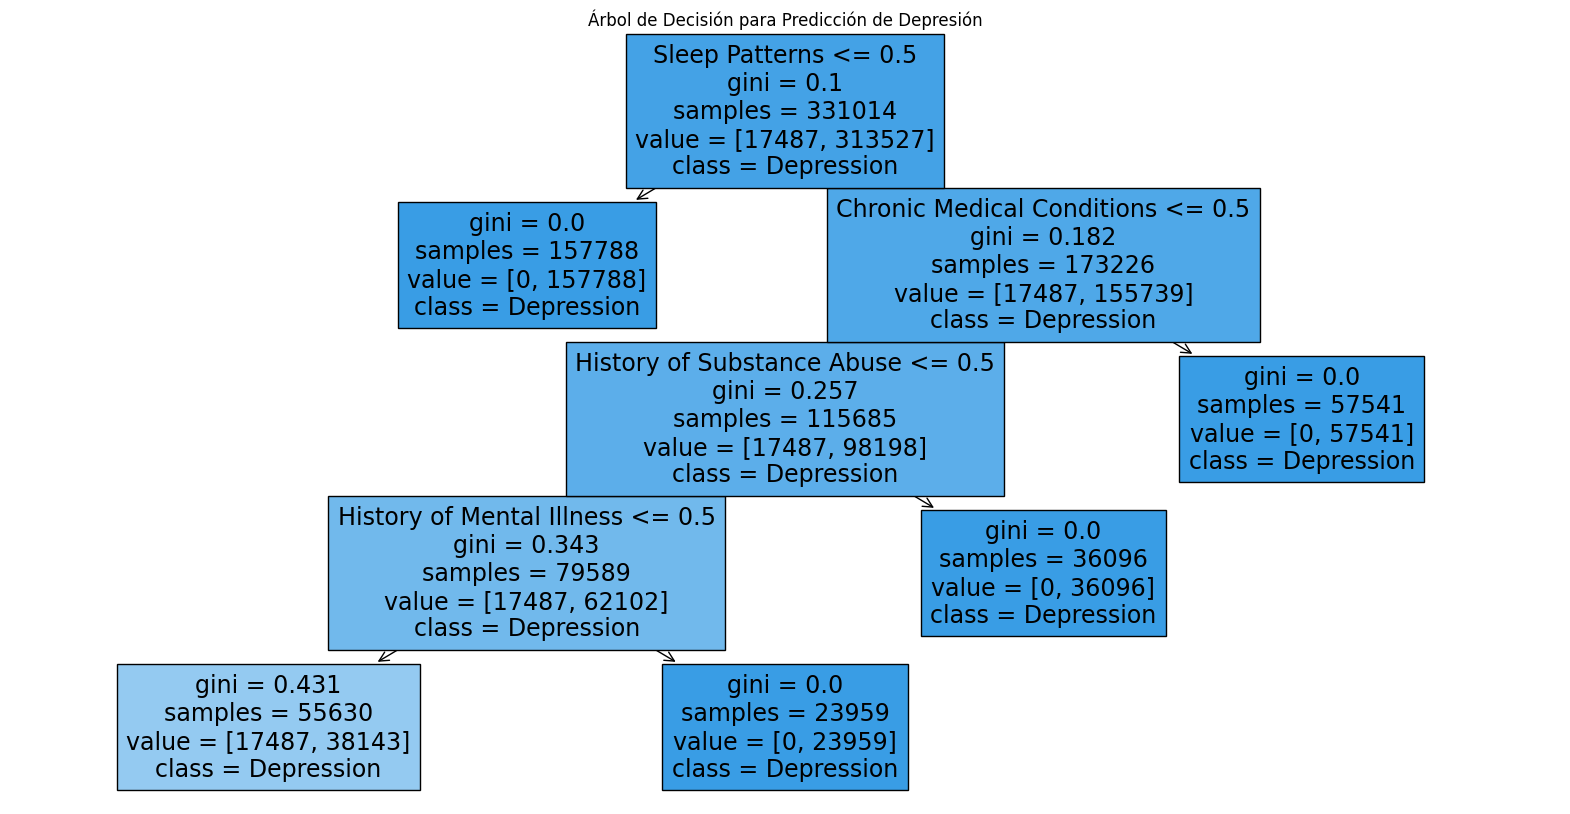

In [24]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=["No Depression", "Depression"], filled=True)
plt.title("Árbol de Decisión para Predicción de Depresión")
plt.show()

# Random forest

=== Random Forest ===
[[ 4382     0]
 [    0 78372]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4382
           1       1.00      1.00      1.00     78372

    accuracy                           1.00     82754
   macro avg       1.00      1.00      1.00     82754
weighted avg       1.00      1.00      1.00     82754

Precisión del modelo RF es : 1.0


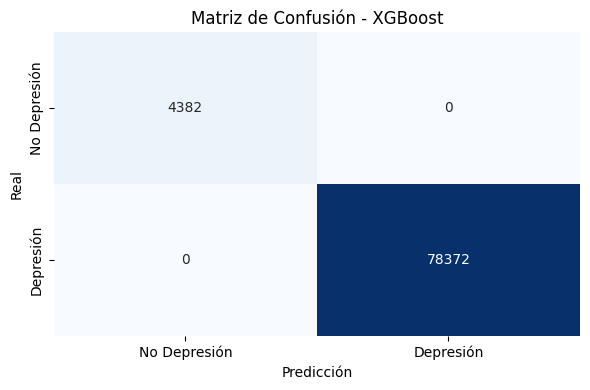

In [25]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo (precisión y otras métricas)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Precisión del modelo RF es :", accuracy_rf)

# Obtener matriz de confusión (ejemplo con XGBoost; puedes cambiar a y_pred_rf para Random Forest)
cmrf = confusion_matrix(y_test, y_pred_rf)

# Crear un gráfico tipo heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["No Depresión", "Depresión"],
            yticklabels=["No Depresión", "Depresión"])
plt.title("Matriz de Confusión - XGBoost")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


# XGBoost

=== XGBoost ===
Precisión: 1.0000
[[ 4382     0]
 [    0 78372]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4382
           1       1.00      1.00      1.00     78372

    accuracy                           1.00     82754
   macro avg       1.00      1.00      1.00     82754
weighted avg       1.00      1.00      1.00     82754

La presición del modelo mediante XGBoost es:  1.0


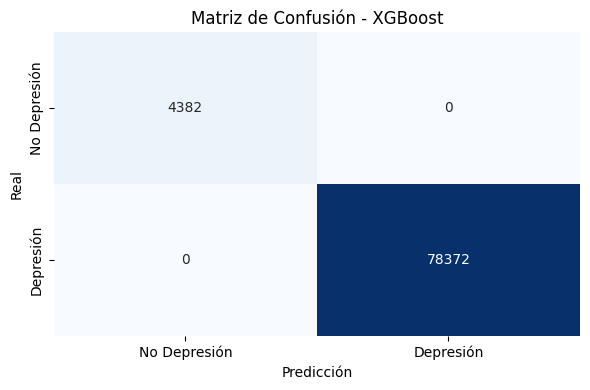

In [26]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo (precisión y otras métricas)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("=== XGBoost ===")
print(f"Precisión: {accuracy_xgb:.4f}")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("La presición del modelo mediante XGBoost es: ", accuracy_xgb)

# Obtener matriz de confusión (ejemplo con XGBoost; puedes cambiar a y_pred_rf para Random Forest)
cmxgb = confusion_matrix(y_test, y_pred_xgb)

# Crear un gráfico tipo heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cmxgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["No Depresión", "Depresión"],
            yticklabels=["No Depresión", "Depresión"])
plt.title("Matriz de Confusión - XGBoost")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


# LigthGBoost

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 313527, number of negative: 17487
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 331014, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.947171 -> initscore=2.886428
[LightGBM] [Info] Start training from score 2.886428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

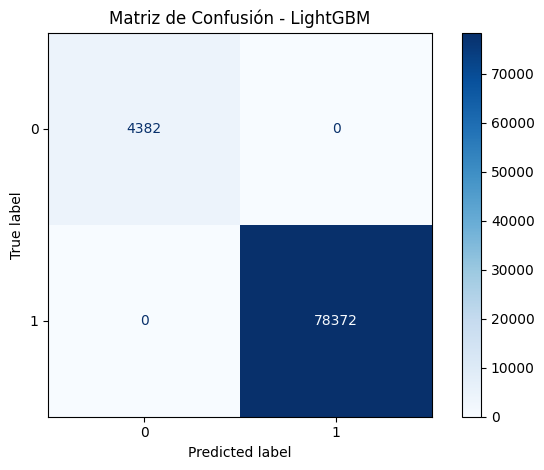

In [27]:
import lightgbm as lgb

# Crear y entrenar el modelo LightGBM
lgb_model = lgb.LGBMClassifier(
    random_state=42,
    n_jobs=1,
    num_leaves=15,
    max_depth=4,
    n_estimators=100
)
lgb_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = lgb_model.predict(X_test)

# Métricas
accuracyligth = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracyligth:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("La presición del modelo mediante LigthBoost es: ", accuracyligth)

# Matriz de confusión como imagen
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión - LightGBM")
plt.grid(False)
plt.tight_layout()
plt.show()